In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import loompy

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()
results_file = './write/pancreas.h5ad'

scanpy==1.3.1 anndata==0.6.10 numpy==1.15.1 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.19.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
sc.settings.set_figure_params(dpi=80)

In [ ]:
#(filename, sparse=True, cleanup=False, X_name='spliced', obs_names='CellID', var_names='Gene'

In [3]:
adata = sc.read_loom(
    '/Users/ghaliburton/Desktop/pancreas.loom', sparse=True, cleanup=False, X_name='spliced', obs_names='CellID', var_names='Gene')

In [4]:
adata

AnnData object with n_obs × n_vars = 2528 × 58347 
    obs: 'ACCUMULATION_LEVEL', 'ALIGNED_READS', 'AT_DROPOUT', 'Aligned 0 time', 'Aligned 1 time', 'Aligned >1 times', 'Aligned concordantly 1 time', 'Aligned concordantly >1 times', 'Aligned concordantly or discordantly 0 t', 'Aligned discordantly 1 time', 'BAD_CYCLES.FIRST_OF_PAIR', 'BAD_CYCLES.PAIR', 'BAD_CYCLES.SECOND_OF_PAIR', 'CODING_BASES', 'CORRECT_STRAND_READS', 'ESTIMATED_LIBRARY_SIZE', 'GC_DROPOUT', 'GC_NC_0_19', 'GC_NC_20_39', 'GC_NC_40_59', 'GC_NC_60_79', 'GC_NC_80_100', 'IGNORED_READS', 'INCORRECT_STRAND_READS', 'INTERGENIC_BASES', 'INTRONIC_BASES', 'MAX_INSERT_SIZE', 'MEAN_INSERT_SIZE', 'MEAN_READ_LENGTH.FIRST_OF_PAIR', 'MEAN_READ_LENGTH.PAIR', 'MEAN_READ_LENGTH.SECOND_OF_PAIR', 'MEDIAN_3PRIME_BIAS', 'MEDIAN_5PRIME_BIAS', 'MEDIAN_5PRIME_TO_3PRIME_BIAS', 'MEDIAN_ABSOLUTE_DEVIATION', 'MEDIAN_CV_COVERAGE', 'MEDIAN_INSERT_SIZE', 'MIN_INSERT_SIZE', 'NUM_R1_TRANSCRIPT_STRAND_READS', 'NUM_R2_TRANSCRIPT_STRAND_READS', 'NUM_UNEXPL

In [5]:
#adata = sc.read_loom('/Users/ghaliburton/Desktop/pancreas.loom').T  # transpose the data
#genes = pd.read_csv(path + 'genes.tsv', header=None, sep='\t')
#adata.var_names = genes[1]
genes = adata.var_names
#adata.var['gene_ids'] = genes[0]  # add the gene ids as annotation of the variables/genes
#adata.obs_names = pd.read_csv(path + 'barcodes.tsv', header=None)[0]
obs = adata.obs_names

In [6]:
obs

Index(['929a1b2d-8ceb-47ae-ada1-93357fc38be7',
       'cb579b54-2b01-4ba6-b542-3f44eee213f6',
       'b41a9ab7-f236-486e-884c-3307d30fd375',
       'f9807bbf-3b90-4965-acc3-9124ab04b534',
       '373bee31-8a8e-4a7a-b44d-35c26b708b46',
       '57c9a208-0b71-4314-a306-30fffa7f9335',
       'e1c4cc2b-8a72-4485-8cfd-39016082b45e',
       'd31da4fc-07d8-4ab0-be4e-e0b4c465afdc',
       '3b515eeb-fb1d-4110-a1a2-b1cfd335252c',
       'a59c23a4-4c8c-4df1-ac72-c6c22b08df8f',
       ...
       '5f1c2bf1-bf05-4be6-b167-5be938e1138a',
       '351c9924-d657-43d6-b701-c0a545ffc2b1',
       '0f1337c5-6219-4ad0-b15f-cf7cc3a89c73',
       'dddebc4b-dd89-4b10-b509-c5311d6f6960',
       'aaf162be-4f46-4ab7-b6f7-501a3e4bed1d',
       '5e40b12d-4ea3-470d-b7cc-ba85fabd6f8c',
       'f6283726-a107-47d1-91d8-e34ac094b34d',
       '12f8d01f-d6bb-410e-a4a8-2ef745f7d4b7',
       '33f4eee2-ed7f-4426-90aa-c2f6d6d99e13',
       '4bc0660d-1ae0-4872-a4d9-b2b5be544fa8'],
      dtype='object', length=2528)

## this would be a good place to remove all of the extra fields

In [ ]:
#maybe...but not sure how to do it

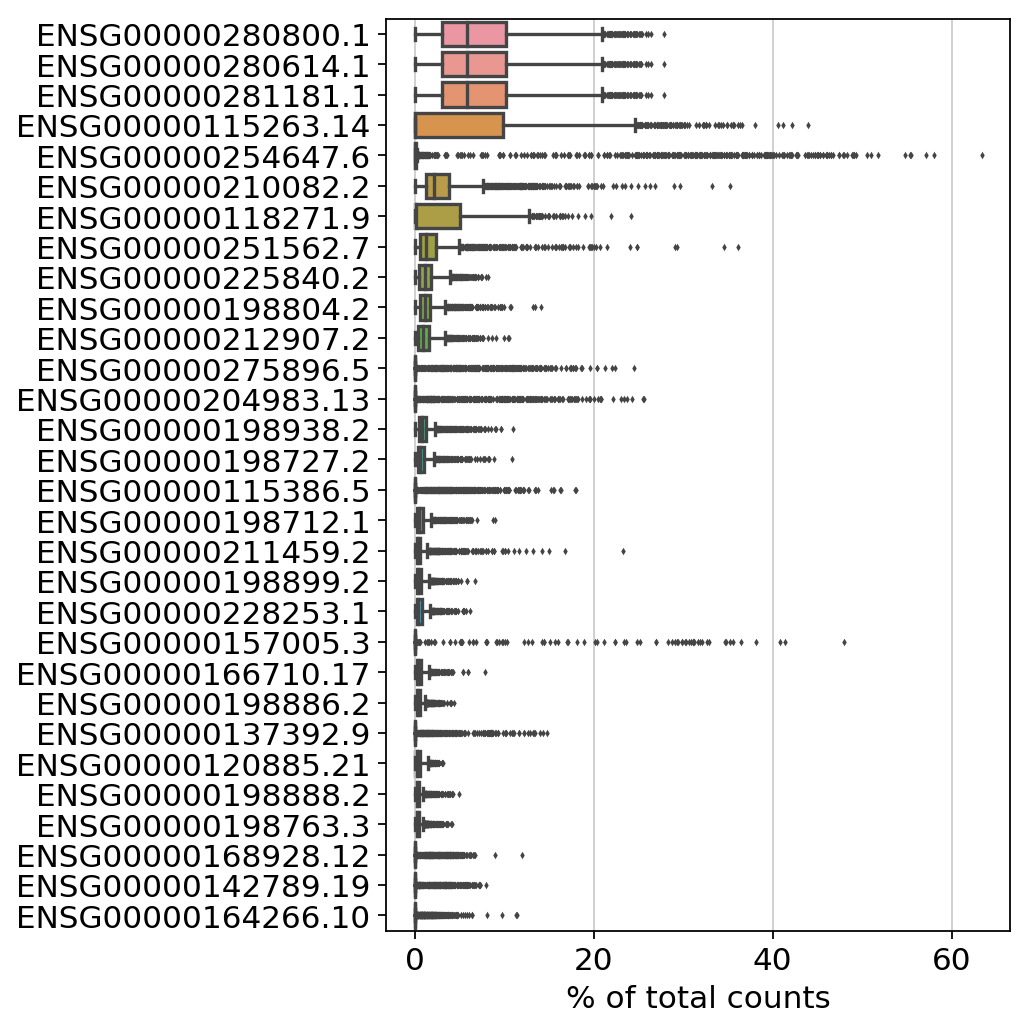

In [7]:
sc.pl.highest_expr_genes(adata, n_top=30)

In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 23328 genes that are detected in less than 3 cells


### skipping the mito stuff for now
Need to annotate the genes -- no quick path from ENSG ids to MT genes

In [9]:
#mito_genes = [name for name in adata.var_names if name.startswith('MT-')]
## for each cell compute fraction of counts in mito genes vs. all genes
## the `.A1` is only necessary as X is sparse to transform to a dense array after summing
#adata.obs['percent_mito'] = np.sum(
#    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
## add the total counts per cell as observations-annotation to adata
#adata.obs['n_counts'] = adata.X.sum(axis=1).A1

In [10]:
adata = adata[adata.obs['n_genes'] < 2500, :]

In [11]:
adata.raw = sc.pp.log1p(adata, copy=True)

In [12]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scanpy/preprocessing/simple.py:338: RuntimeWarning: invalid value encountered in true_divide
  / disp_std_bin[df['mean_bin']].values


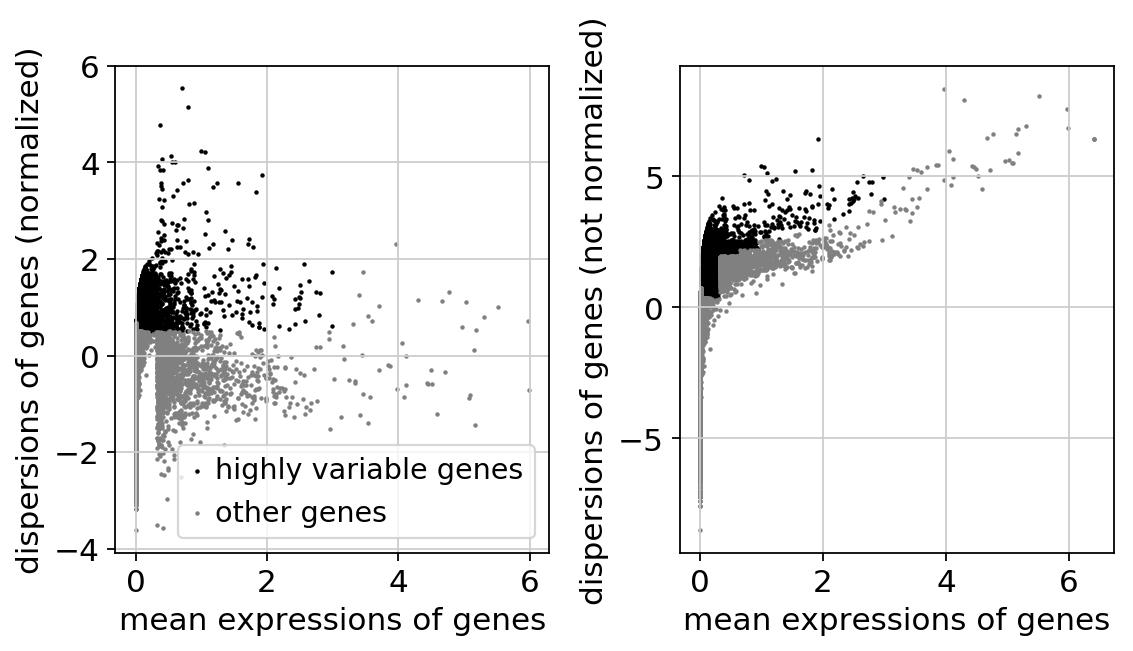

In [13]:
filter_result = sc.pp.filter_genes_dispersion(
    adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)

In [14]:
adata = adata[:, filter_result.gene_subset]

In [15]:
sc.pp.log1p(adata)

### skipping the regressing out of mito genes

In [16]:
#sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

In [17]:
sc.pp.scale(adata, max_value=10)

In [18]:
adata.write(results_file)

## PCA 

In [19]:
sc.tl.pca(adata, svd_solver='arpack')

In [20]:
sc.pl.pca(adata, color='CST3')

... storing 'ACCUMULATION_LEVEL' as categorical
... storing 'Aligned 1 time' as categorical
... storing 'Aligned >1 times' as categorical
... storing 'Aligned discordantly 1 time' as categorical
... storing 'BAD_CYCLES.FIRST_OF_PAIR' as categorical
... storing 'BAD_CYCLES.PAIR' as categorical
... storing 'BAD_CYCLES.SECOND_OF_PAIR' as categorical
... storing 'CORRECT_STRAND_READS' as categorical
... storing 'GC_DROPOUT' as categorical
... storing 'IGNORED_READS' as categorical
... storing 'INCORRECT_STRAND_READS' as categorical
... storing 'MEDIAN_5PRIME_BIAS' as categorical
... storing 'MEDIAN_5PRIME_TO_3PRIME_BIAS' as categorical
... storing 'MEDIAN_ABSOLUTE_DEVIATION' as categorical
... storing 'MEDIAN_INSERT_SIZE' as categorical
... storing 'MIN_INSERT_SIZE' as categorical
... storing 'Overall alignment rate' as categorical
... storing 'PAIR_ORIENTATION' as categorical
... storing 'PCT_ADAPTER.FIRST_OF_PAIR' as categorical
... storing 'PCT_ADAPTER.PAIR' as categorical
... storing '

ValueError: key 'CST3' is invalid! pass valid observation annotation, one of ['ACCUMULATION_LEVEL', 'ALIGNED_READS', 'AT_DROPOUT', 'Aligned 0 time', 'Aligned 1 time', 'Aligned >1 times', 'Aligned concordantly 1 time', 'Aligned concordantly >1 times', 'Aligned concordantly or discordantly 0 t', 'Aligned discordantly 1 time', 'BAD_CYCLES.FIRST_OF_PAIR', 'BAD_CYCLES.PAIR', 'BAD_CYCLES.SECOND_OF_PAIR', 'CODING_BASES', 'CORRECT_STRAND_READS', 'ESTIMATED_LIBRARY_SIZE', 'GC_DROPOUT', 'GC_NC_0_19', 'GC_NC_20_39', 'GC_NC_40_59', 'GC_NC_60_79', 'GC_NC_80_100', 'IGNORED_READS', 'INCORRECT_STRAND_READS', 'INTERGENIC_BASES', 'INTRONIC_BASES', 'MAX_INSERT_SIZE', 'MEAN_INSERT_SIZE', 'MEAN_READ_LENGTH.FIRST_OF_PAIR', 'MEAN_READ_LENGTH.PAIR', 'MEAN_READ_LENGTH.SECOND_OF_PAIR', 'MEDIAN_3PRIME_BIAS', 'MEDIAN_5PRIME_BIAS', 'MEDIAN_5PRIME_TO_3PRIME_BIAS', 'MEDIAN_ABSOLUTE_DEVIATION', 'MEDIAN_CV_COVERAGE', 'MEDIAN_INSERT_SIZE', 'MIN_INSERT_SIZE', 'NUM_R1_TRANSCRIPT_STRAND_READS', 'NUM_R2_TRANSCRIPT_STRAND_READS', 'NUM_UNEXPLAINED_READS', 'Overall alignment rate', 'PAIR_ORIENTATION', 'PCT_ADAPTER.FIRST_OF_PAIR', 'PCT_ADAPTER.PAIR', 'PCT_ADAPTER.SECOND_OF_PAIR', 'PCT_CHIMERAS.FIRST_OF_PAIR', 'PCT_CHIMERAS.PAIR', 'PCT_CHIMERAS.SECOND_OF_PAIR', 'PCT_CODING_BASES', 'PCT_CORRECT_STRAND_READS', 'PCT_INTERGENIC_BASES', 'PCT_INTRONIC_BASES', 'PCT_MRNA_BASES', 'PCT_PF_READS.FIRST_OF_PAIR', 'PCT_PF_READS.PAIR', 'PCT_PF_READS.SECOND_OF_PAIR', 'PCT_PF_READS_ALIGNED.FIRST_OF_PAIR', 'PCT_PF_READS_ALIGNED.PAIR', 'PCT_PF_READS_ALIGNED.SECOND_OF_PAIR', 'PCT_PF_READS_IMPROPER_PAIRS.FIRST_OF_PAI', 'PCT_PF_READS_IMPROPER_PAIRS.PAIR', 'PCT_PF_READS_IMPROPER_PAIRS.SECOND_OF_PA', 'PCT_R1_TRANSCRIPT_STRAND_READS', 'PCT_R2_TRANSCRIPT_STRAND_READS', 'PCT_READS_ALIGNED_IN_PAIRS.FIRST_OF_PAIR', 'PCT_READS_ALIGNED_IN_PAIRS.PAIR', 'PCT_READS_ALIGNED_IN_PAIRS.SECOND_OF_PAI', 'PCT_RIBOSOMAL_BASES', 'PCT_USABLE_BASES', 'PCT_UTR_BASES', 'PERCENT_DUPLICATION', 'PF_ALIGNED_BASES', 'PF_ALIGNED_BASES.FIRST_OF_PAIR', 'PF_ALIGNED_BASES.PAIR', 'PF_ALIGNED_BASES.SECOND_OF_PAIR', 'PF_BASES', 'PF_HQ_ALIGNED_BASES.FIRST_OF_PAIR', 'PF_HQ_ALIGNED_BASES.PAIR', 'PF_HQ_ALIGNED_BASES.SECOND_OF_PAIR', 'PF_HQ_ALIGNED_Q20_BASES.FIRST_OF_PAIR', 'PF_HQ_ALIGNED_Q20_BASES.PAIR', 'PF_HQ_ALIGNED_Q20_BASES.SECOND_OF_PAIR', 'PF_HQ_ALIGNED_READS.FIRST_OF_PAIR', 'PF_HQ_ALIGNED_READS.PAIR', 'PF_HQ_ALIGNED_READS.SECOND_OF_PAIR', 'PF_HQ_ERROR_RATE.FIRST_OF_PAIR', 'PF_HQ_ERROR_RATE.PAIR', 'PF_HQ_ERROR_RATE.SECOND_OF_PAIR', 'PF_HQ_MEDIAN_MISMATCHES.FIRST_OF_PAIR', 'PF_HQ_MEDIAN_MISMATCHES.PAIR', 'PF_HQ_MEDIAN_MISMATCHES.SECOND_OF_PAIR', 'PF_INDEL_RATE.FIRST_OF_PAIR', 'PF_INDEL_RATE.PAIR', 'PF_INDEL_RATE.SECOND_OF_PAIR', 'PF_MISMATCH_RATE.FIRST_OF_PAIR', 'PF_MISMATCH_RATE.PAIR', 'PF_MISMATCH_RATE.SECOND_OF_PAIR', 'PF_NOISE_READS.FIRST_OF_PAIR', 'PF_NOISE_READS.PAIR', 'PF_NOISE_READS.SECOND_OF_PAIR', 'PF_READS.FIRST_OF_PAIR', 'PF_READS.PAIR', 'PF_READS.SECOND_OF_PAIR', 'PF_READS_ALIGNED.FIRST_OF_PAIR', 'PF_READS_ALIGNED.PAIR', 'PF_READS_ALIGNED.SECOND_OF_PAIR', 'PF_READS_IMPROPER_PAIRS.FIRST_OF_PAIR', 'PF_READS_IMPROPER_PAIRS.PAIR', 'PF_READS_IMPROPER_PAIRS.SECOND_OF_PAIR', 'READS_ALIGNED_IN_PAIRS.FIRST_OF_PAIR', 'READS_ALIGNED_IN_PAIRS.PAIR', 'READS_ALIGNED_IN_PAIRS.SECOND_OF_PAIR', 'READS_USED', 'READ_PAIRS', 'READ_PAIRS_EXAMINED', 'READ_PAIR_DUPLICATES', 'READ_PAIR_OPTICAL_DUPLICATES', 'RIBOSOMAL_BASES', 'SECONDARY_OR_SUPPLEMENTARY_RDS', 'STANDARD_DEVIATION', 'STRAND_BALANCE.FIRST_OF_PAIR', 'STRAND_BALANCE.PAIR', 'STRAND_BALANCE.SECOND_OF_PAIR', 'TOTAL_CLUSTERS', 'TOTAL_READS.FIRST_OF_PAIR', 'TOTAL_READS.PAIR', 'TOTAL_READS.SECOND_OF_PAIR', 'Total pairs', 'Total unpaired reads', 'UNMAPPED_READS', 'UNPAIRED_READS_EXAMINED', 'UNPAIRED_READ_DUPLICATES', 'UTR_BASES', 'WIDTH_OF_10_PERCENT', 'WIDTH_OF_20_PERCENT', 'WIDTH_OF_30_PERCENT', 'WIDTH_OF_40_PERCENT', 'WIDTH_OF_50_PERCENT', 'WIDTH_OF_60_PERCENT', 'WIDTH_OF_70_PERCENT', 'WIDTH_OF_80_PERCENT', 'WIDTH_OF_90_PERCENT', 'WIDTH_OF_99_PERCENT', 'WINDOW_SIZE', 'alignable reads', 'filtered reads', 'multiple mapped', 'strand', 'total alignments', 'total reads', 'unalignable reads', 'uncertain reads', 'unique aligned', 'n_genes', 'n_counts'] or a gene name Index(['ENSG00000000003.14', 'ENSG00000000419.12', 'ENSG00000000971.15',
       'ENSG00000001036.13', 'ENSG00000001084.10', 'ENSG00000001167.14',
       'ENSG00000001497.16', 'ENSG00000001626.14', 'ENSG00000001629.9',
       'ENSG00000001630.15',
       ...
       'ENSG00000283900.1', 'ENSG00000284294.1', 'ENSG00000284428.1',
       'ENSG00000284503.1', 'ENSG00000284617.1', 'ENSG00000284630.1',
       'ENSG00000284660.1', 'ENSG00000284661.1', 'ENSG00000284673.1',
       'ENSG00000284691.1'],
      dtype='object', length=9032)

In [ ]:
# hmmmm yep looks like i defintely need to remove some fields somewhere up above before i can do PCA